In [1]:
import numpy as np
import torch
from torch import nn
import os
from numpy import *
import decoding 
import analysis
import training

In [2]:
data_behavior=np.load('./data/demo_session_behavior.npy',allow_pickle=True)
data_control=np.load('./data/demo_session_control.npy',allow_pickle=True)

torch.random.manual_seed(1) # for reproducing
np.random.seed(1)

In [3]:
########### hyper parameter setting for standard RNN ###########
lr=0.0001
epochs=100 # epochs for training RNN-S1
en_epochs=20 # epochs for training RNN-S2, the training is very slow, keep #epochs small if unnecessary
batch_size=5
min_t=600 # The overall #time points is 1800 for 60 secs, so 600-900 means -10s before the behavior to the behavior. 
max_t=900
########### hyper parameter setting for TV RNN ############
lr_tv=0.0001
epochs_tv=100
batch_size_tv=128
num_tv=10
num_fold=5
t_ind_ini=np.linspace(0,max_t-min_t,num_tv+1).astype(int)
device = device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
dtype = torch.float32
###########################################

In [4]:
data_input,data_label=decoding.data_processing(data_behavior,data_control)
data_input=data_input[:,min_t:max_t,:]
data_input=torch.tensor(data_input,dtype=dtype,device=device)
data_label=torch.tensor(data_label,dtype=dtype,device=device)
input_s=data_input.shape[2]

In [5]:
save_val_S1,save_val_S2,save_val_tv=training.start_train(lr,
                                                epochs,
                                                en_epochs,
                                                batch_size,
                                                lr_tv,
                                                epochs_tv,
                                                batch_size_tv,
                                                num_tv,
                                                num_fold,
                                                data_input,
                                                data_label,
                                                t_ind_ini,
                                                s1=True,
                                                s2=True,
                                                tv=True,
                                                save_model=True,
                                                path='./save/',
                                                device=device)

start: 0
Epoch 1/20, loss = 207.84752973738838,accuracy=0.514792899408284, val_accuracy=0.4418604651162791
Epoch 2/20, loss = 207.84189129226348,accuracy=0.514792899408284, val_accuracy=0.4418604651162791
Epoch 3/20, loss = 207.83175918810508,accuracy=0.514792899408284, val_accuracy=0.4418604651162791
Epoch 4/20, loss = 207.77258316208335,accuracy=0.514792899408284, val_accuracy=0.4418604651162791
Epoch 5/20, loss = 207.83483369560804,accuracy=0.514792899408284, val_accuracy=0.4418604651162791
Epoch 6/20, loss = 207.81620625362677,accuracy=0.514792899408284, val_accuracy=0.4418604651162791
Epoch 7/20, loss = 207.80386915627648,accuracy=0.514792899408284, val_accuracy=0.4418604651162791
Epoch 8/20, loss = 207.7829019479892,accuracy=0.514792899408284, val_accuracy=0.4418604651162791
Epoch 9/20, loss = 207.81440020308776,accuracy=0.514792899408284, val_accuracy=0.4418604651162791
Epoch 10/20, loss = 207.74944024752168,accuracy=0.514792899408284, val_accuracy=0.4418604651162791
Epoch 11/20

Epoch 65/100, loss = 0.39242198011454416,accuracy=0.8165680473372781, val_accuracy=0.7674418604651163
Epoch 66/100, loss = 0.33801360647468004,accuracy=0.8757396449704142, val_accuracy=0.7906976744186046
Epoch 67/100, loss = 0.36493175695924196,accuracy=0.863905325443787, val_accuracy=0.8837209302325582
Epoch 68/100, loss = 0.3454521482481676,accuracy=0.8224852071005917, val_accuracy=0.7441860465116279
Epoch 69/100, loss = 0.37711141061256914,accuracy=0.7810650887573964, val_accuracy=0.7441860465116279
Epoch 70/100, loss = 0.4929098116562647,accuracy=0.8698224852071006, val_accuracy=0.8604651162790697
Epoch 71/100, loss = 0.5030154379851678,accuracy=0.7337278106508875, val_accuracy=0.6976744186046512
Epoch 72/100, loss = 0.5493418569950497,accuracy=0.7928994082840237, val_accuracy=0.7906976744186046
Epoch 73/100, loss = 0.376142915995682,accuracy=0.8579881656804734, val_accuracy=0.7674418604651163
Epoch 74/100, loss = 0.42444391680114407,accuracy=0.8106508875739645, val_accuracy=0.7906

Epoch 37/100, loss = 194.72047939896584,val_loss = 203.07231548428535,accuracy=0.863905325443787, val_accuracy=0.8372093023255814
Epoch 38/100, loss = 198.27517308294773,val_loss = 202.94379642605782,accuracy=0.863905325443787, val_accuracy=0.8372093023255814
Epoch 39/100, loss = 196.29716369509697,val_loss = 202.73296576738358,accuracy=0.863905325443787, val_accuracy=0.8372093023255814
Epoch 40/100, loss = 195.08398993313313,val_loss = 202.69493234157562,accuracy=0.863905325443787, val_accuracy=0.813953488372093
Epoch 41/100, loss = 197.28416265547276,val_loss = 202.76881608366966,accuracy=0.863905325443787, val_accuracy=0.813953488372093
Epoch 42/100, loss = 195.55780039727688,val_loss = 202.82052156329155,accuracy=0.8698224852071006, val_accuracy=0.813953488372093
Epoch 43/100, loss = 195.30504880845547,val_loss = 202.87517502903938,accuracy=0.8698224852071006, val_accuracy=0.813953488372093
Epoch 44/100, loss = 196.4342247247696,val_loss = 202.87466019392014,accuracy=0.869822485207

Epoch 1/20, loss = 209.02912389530854,accuracy=0.47928994082840237, val_accuracy=0.5813953488372093
Epoch 2/20, loss = 208.95648794139132,accuracy=0.47928994082840237, val_accuracy=0.5813953488372093
Epoch 3/20, loss = 208.83639898896217,accuracy=0.47928994082840237, val_accuracy=0.5813953488372093
Epoch 4/20, loss = 208.7013846197549,accuracy=0.47928994082840237, val_accuracy=0.5813953488372093
Epoch 5/20, loss = 208.52189287893913,accuracy=0.47928994082840237, val_accuracy=0.5813953488372093
Epoch 6/20, loss = 208.36280042634291,accuracy=0.47928994082840237, val_accuracy=0.5813953488372093
Epoch 7/20, loss = 208.21047086400145,accuracy=0.47337278106508873, val_accuracy=0.5813953488372093
Epoch 8/20, loss = 208.01778984069824,accuracy=0.5266272189349113, val_accuracy=0.5813953488372093
Epoch 9/20, loss = 207.9464856281,accuracy=0.4437869822485207, val_accuracy=0.4186046511627907
Epoch 10/20, loss = 207.7680822610855,accuracy=0.46745562130177515, val_accuracy=0.32558139534883723
Epoch 

Epoch 65/100, loss = 0.3501705579897937,accuracy=0.8224852071005917, val_accuracy=0.7906976744186046
Epoch 66/100, loss = 0.35597976713496093,accuracy=0.9112426035502958, val_accuracy=0.8604651162790697
Epoch 67/100, loss = 0.31735724429873857,accuracy=0.8224852071005917, val_accuracy=0.7906976744186046
Epoch 68/100, loss = 0.41807614880449634,accuracy=0.8402366863905325, val_accuracy=0.8604651162790697
Epoch 69/100, loss = 0.3810970340581501,accuracy=0.8875739644970414, val_accuracy=0.8837209302325582
Epoch 70/100, loss = 0.46365470570676465,accuracy=0.893491124260355, val_accuracy=0.8372093023255814
Epoch 71/100, loss = 0.3060311692602494,accuracy=0.9053254437869822, val_accuracy=0.8837209302325582
Epoch 72/100, loss = 0.39636249774519133,accuracy=0.8106508875739645, val_accuracy=0.7906976744186046
Epoch 73/100, loss = 0.3194329613710151,accuracy=0.8875739644970414, val_accuracy=0.8837209302325582
Epoch 74/100, loss = 0.31004195726093126,accuracy=0.8816568047337278, val_accuracy=0.86

Epoch 37/100, loss = 198.38545075058937,val_loss = 201.82112601399422,accuracy=0.8520710059171598, val_accuracy=0.8604651162790697
Epoch 38/100, loss = 197.32398138940334,val_loss = 201.81760448217392,accuracy=0.8461538461538461, val_accuracy=0.8604651162790697
Epoch 39/100, loss = 197.61215855926275,val_loss = 201.79559072852135,accuracy=0.8461538461538461, val_accuracy=0.8604651162790697
Epoch 40/100, loss = 195.41639956831932,val_loss = 201.65835013985634,accuracy=0.8461538461538461, val_accuracy=0.8837209302325582
Epoch 41/100, loss = 199.71968534588814,val_loss = 201.51436766982079,accuracy=0.8520710059171598, val_accuracy=0.8837209302325582
Epoch 42/100, loss = 196.04463471472263,val_loss = 201.47168231010437,accuracy=0.8757396449704142, val_accuracy=0.8837209302325582
Epoch 43/100, loss = 196.89547404646873,val_loss = 201.52587121725082,accuracy=0.8757396449704142, val_accuracy=0.8604651162790697
Epoch 44/100, loss = 198.52065263688564,val_loss = 201.46818327903748,accuracy=0.87

Epoch 100/100, loss = 193.13231872022152,val_loss = 196.30492827296257,accuracy=0.8579881656804734, val_accuracy=0.8837209302325582
start: 2
Epoch 1/20, loss = 208.37455663961524,accuracy=0.4823529411764706, val_accuracy=0.5714285714285714
Epoch 2/20, loss = 208.30977089966044,accuracy=0.4823529411764706, val_accuracy=0.5714285714285714
Epoch 3/20, loss = 208.23931297835182,accuracy=0.4823529411764706, val_accuracy=0.5714285714285714
Epoch 4/20, loss = 208.21243811880842,accuracy=0.4823529411764706, val_accuracy=0.5714285714285714
Epoch 5/20, loss = 208.11109644349884,accuracy=0.4823529411764706, val_accuracy=0.5714285714285714
Epoch 6/20, loss = 208.1876523354474,accuracy=0.4823529411764706, val_accuracy=0.5714285714285714
Epoch 7/20, loss = 208.03409429683404,accuracy=0.4764705882352941, val_accuracy=0.5476190476190477
Epoch 8/20, loss = 208.0250599682331,accuracy=0.4823529411764706, val_accuracy=0.5714285714285714
Epoch 9/20, loss = 207.88985807755415,accuracy=0.4117647058823529, va

Epoch 62/100, loss = 0.660244815489825,accuracy=0.711764705882353, val_accuracy=0.8095238095238095
Epoch 63/100, loss = 0.6768289488904616,accuracy=0.6411764705882353, val_accuracy=0.7857142857142857
Epoch 64/100, loss = 0.6608987678499783,accuracy=0.6647058823529411, val_accuracy=0.6666666666666666
Epoch 65/100, loss = 0.634901217678014,accuracy=0.7176470588235294, val_accuracy=0.7857142857142857
Epoch 66/100, loss = 0.6396791268797482,accuracy=0.6294117647058823, val_accuracy=0.7142857142857143
Epoch 67/100, loss = 0.6710801562842201,accuracy=0.6235294117647059, val_accuracy=0.7857142857142857
Epoch 68/100, loss = 0.6479978438685922,accuracy=0.8, val_accuracy=0.8571428571428571
Epoch 69/100, loss = 0.6117285183247398,accuracy=0.7647058823529411, val_accuracy=0.8809523809523809
Epoch 70/100, loss = 0.5748212170951507,accuracy=0.8705882352941177, val_accuracy=0.9047619047619048
Epoch 71/100, loss = 0.5715698705000036,accuracy=0.7705882352941177, val_accuracy=0.8571428571428571
Epoch 72

Epoch 34/100, loss = 199.040631249547,val_loss = 197.16413137316704,accuracy=0.8764705882352941, val_accuracy=0.9047619047619048
Epoch 35/100, loss = 196.55757588148117,val_loss = 196.93455052375793,accuracy=0.8823529411764706, val_accuracy=0.9047619047619048
Epoch 36/100, loss = 196.2627819031477,val_loss = 196.68005895614624,accuracy=0.8823529411764706, val_accuracy=0.9047619047619048
Epoch 37/100, loss = 195.29435540735722,val_loss = 196.46776175498962,accuracy=0.8823529411764706, val_accuracy=0.9047619047619048
Epoch 38/100, loss = 199.8349372446537,val_loss = 196.25642031431198,accuracy=0.8823529411764706, val_accuracy=0.9047619047619048
Epoch 39/100, loss = 197.07948932796717,val_loss = 196.05580365657806,accuracy=0.888235294117647, val_accuracy=0.9047619047619048
Epoch 40/100, loss = 197.32165783643723,val_loss = 195.95330148935318,accuracy=0.8823529411764706, val_accuracy=0.9047619047619048
Epoch 41/100, loss = 194.96982154250145,val_loss = 195.92185366153717,accuracy=0.8882352

Epoch 97/100, loss = 192.1738259792328,val_loss = 193.57333889603615,accuracy=0.8823529411764706, val_accuracy=0.9047619047619048
Epoch 98/100, loss = 194.813521489501,val_loss = 193.73912447690964,accuracy=0.8764705882352941, val_accuracy=0.9047619047619048
Epoch 99/100, loss = 195.1239210665226,val_loss = 193.64633145928383,accuracy=0.8764705882352941, val_accuracy=0.9047619047619048
Epoch 100/100, loss = 194.92034006118774,val_loss = 193.35767951607704,accuracy=0.888235294117647, val_accuracy=0.9047619047619048
start: 3
Epoch 1/20, loss = 208.67013207253288,accuracy=0.4823529411764706, val_accuracy=0.5714285714285714
Epoch 2/20, loss = 208.59998787676588,accuracy=0.4823529411764706, val_accuracy=0.5714285714285714
Epoch 3/20, loss = 208.55309854710802,accuracy=0.4823529411764706, val_accuracy=0.5714285714285714
Epoch 4/20, loss = 208.49445394382758,accuracy=0.4823529411764706, val_accuracy=0.5714285714285714
Epoch 5/20, loss = 208.35943997256896,accuracy=0.4823529411764706, val_accu

Epoch 60/100, loss = 0.2943618698593448,accuracy=0.8235294117647058, val_accuracy=0.8333333333333334
Epoch 61/100, loss = 0.32839597235707674,accuracy=0.8823529411764706, val_accuracy=0.7857142857142857
Epoch 62/100, loss = 0.3984681549755966,accuracy=0.8705882352941177, val_accuracy=0.7857142857142857
Epoch 63/100, loss = 0.32171781624064727,accuracy=0.9058823529411765, val_accuracy=0.8571428571428571
Epoch 64/100, loss = 0.2963282424299156,accuracy=0.9058823529411765, val_accuracy=0.8571428571428571
Epoch 65/100, loss = 0.3005034515962881,accuracy=0.8647058823529412, val_accuracy=0.8333333333333334
Epoch 66/100, loss = 0.29363985808894916,accuracy=0.888235294117647, val_accuracy=0.8333333333333334
Epoch 67/100, loss = 0.30806948441792936,accuracy=0.9058823529411765, val_accuracy=0.8571428571428571
Epoch 68/100, loss = 0.3192839932573192,accuracy=0.9, val_accuracy=0.8333333333333334
Epoch 69/100, loss = 0.3137798515312812,accuracy=0.9058823529411765, val_accuracy=0.8333333333333334
Ep

Epoch 33/100, loss = 201.9321532472968,val_loss = 204.8254310786724,accuracy=0.8705882352941177, val_accuracy=0.7619047619047619
Epoch 34/100, loss = 197.0536389350891,val_loss = 204.44444370269775,accuracy=0.8764705882352941, val_accuracy=0.7619047619047619
Epoch 35/100, loss = 198.73977203667164,val_loss = 204.07005268335342,accuracy=0.8705882352941177, val_accuracy=0.7619047619047619
Epoch 36/100, loss = 198.01465767621994,val_loss = 203.72288993000984,accuracy=0.8647058823529412, val_accuracy=0.7619047619047619
Epoch 37/100, loss = 198.6395144686103,val_loss = 203.3644179701805,accuracy=0.8647058823529412, val_accuracy=0.7619047619047619
Epoch 38/100, loss = 199.02931004017591,val_loss = 203.03545063734055,accuracy=0.8764705882352941, val_accuracy=0.7619047619047619
Epoch 39/100, loss = 200.07949598133564,val_loss = 202.72002258896828,accuracy=0.8764705882352941, val_accuracy=0.7857142857142857
Epoch 40/100, loss = 198.9366004317999,val_loss = 202.37004670500755,accuracy=0.87647058

Epoch 97/100, loss = 192.41733176261187,val_loss = 197.97773796319962,accuracy=0.8823529411764706, val_accuracy=0.7619047619047619
Epoch 98/100, loss = 196.6170605123043,val_loss = 198.0496768951416,accuracy=0.8764705882352941, val_accuracy=0.7857142857142857
Epoch 99/100, loss = 193.21797692030668,val_loss = 198.1980895102024,accuracy=0.8705882352941177, val_accuracy=0.8095238095238095
Epoch 100/100, loss = 193.96752912551165,val_loss = 198.14181226491928,accuracy=0.8705882352941177, val_accuracy=0.8095238095238095
start: 4
Epoch 1/20, loss = 208.5572091305957,accuracy=0.49411764705882355, val_accuracy=0.5238095238095238
Epoch 2/20, loss = 208.50241599889364,accuracy=0.49411764705882355, val_accuracy=0.5238095238095238
Epoch 3/20, loss = 208.4802020297331,accuracy=0.49411764705882355, val_accuracy=0.5238095238095238
Epoch 4/20, loss = 208.3673273903482,accuracy=0.49411764705882355, val_accuracy=0.5238095238095238
Epoch 5/20, loss = 208.3484007944079,accuracy=0.49411764705882355, val_a

Epoch 59/100, loss = 0.388157440459027,accuracy=0.8411764705882353, val_accuracy=0.9523809523809523
Epoch 60/100, loss = 0.38568108265890794,accuracy=0.8764705882352941, val_accuracy=0.8571428571428571
Epoch 61/100, loss = 0.3937731933067827,accuracy=0.788235294117647, val_accuracy=0.8571428571428571
Epoch 62/100, loss = 0.3923825991942602,accuracy=0.8294117647058824, val_accuracy=0.8333333333333334
Epoch 63/100, loss = 0.411613668589031,accuracy=0.8588235294117647, val_accuracy=0.8809523809523809
Epoch 64/100, loss = 0.3709891850457472,accuracy=0.9, val_accuracy=0.8809523809523809
Epoch 65/100, loss = 0.45510805485879674,accuracy=0.7176470588235294, val_accuracy=0.7619047619047619
Epoch 66/100, loss = 0.4838562147582279,accuracy=0.8117647058823529, val_accuracy=0.9285714285714286
Epoch 67/100, loss = 0.42676989788956504,accuracy=0.8705882352941177, val_accuracy=0.9285714285714286
Epoch 68/100, loss = 0.3411070704460144,accuracy=0.8117647058823529, val_accuracy=0.9285714285714286
Epoch

Epoch 32/100, loss = 199.00480137765408,val_loss = 194.41324317455292,accuracy=0.8529411764705882, val_accuracy=0.9285714285714286
Epoch 33/100, loss = 197.8609922081232,val_loss = 194.1997483819723,accuracy=0.8529411764705882, val_accuracy=0.9285714285714286
Epoch 34/100, loss = 198.6692751944065,val_loss = 194.0725674033165,accuracy=0.8647058823529412, val_accuracy=0.9523809523809523
Epoch 35/100, loss = 200.98470555245876,val_loss = 193.9823360145092,accuracy=0.8705882352941177, val_accuracy=0.9523809523809523
Epoch 36/100, loss = 198.14753013849258,val_loss = 193.86403815448284,accuracy=0.8647058823529412, val_accuracy=0.9523809523809523
Epoch 37/100, loss = 198.96872697770596,val_loss = 193.68410681188107,accuracy=0.8647058823529412, val_accuracy=0.9285714285714286
Epoch 38/100, loss = 197.45801262557507,val_loss = 193.50422836840153,accuracy=0.8529411764705882, val_accuracy=0.9285714285714286
Epoch 39/100, loss = 196.02592632174492,val_loss = 193.37804321944714,accuracy=0.8588235

Epoch 95/100, loss = 192.54436084628105,val_loss = 190.45760922133923,accuracy=0.8705882352941177, val_accuracy=0.9523809523809523
Epoch 96/100, loss = 193.85013592243195,val_loss = 190.57433401048183,accuracy=0.8705882352941177, val_accuracy=0.9285714285714286
Epoch 97/100, loss = 194.25142511725426,val_loss = 190.7013986557722,accuracy=0.8705882352941177, val_accuracy=0.9523809523809523
Epoch 98/100, loss = 193.48758183419704,val_loss = 190.67950342595577,accuracy=0.8705882352941177, val_accuracy=0.9523809523809523
Epoch 99/100, loss = 194.6679300069809,val_loss = 190.68733410537243,accuracy=0.8764705882352941, val_accuracy=0.9285714285714286
Epoch 100/100, loss = 194.3786836117506,val_loss = 190.6851648390293,accuracy=0.8705882352941177, val_accuracy=0.9285714285714286


In [6]:
#calculate area under accuracy curve (AUAC) and earliest decoding time#
area_s1=analysis.auac(np.mean(save_val_S1,axis=0),10)
area_s2=analysis.auac(np.mean(save_val_S2,axis=0),10)
area_tv=analysis.auac(np.mean(save_val_tv,axis=0),10)
_,early_s1=analysis.get_early(save_val_S1,-10,0)
_,early_s2=analysis.get_early(save_val_S2,-10,0)
__,early_tv=analysis.get_early(save_val_tv,-10,0)

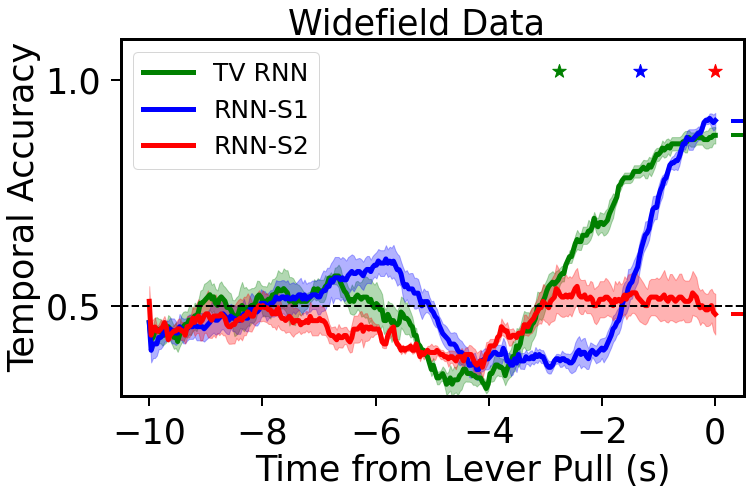

In [7]:
# accuracy curve plot#
fig=analysis.plot_accuracy(save_val_S1,save_val_S2,save_val_tv)

In [8]:
################!!!These will take a very long time!!! Please skip if unneccessary!!!########################
# import shaping # skip shaping if not computing SHAP value
# model_last=torch.load('./save/model_last_1.pt')
# model_tv=torch.load('./save/model_tv_1.pt')
# X_t_train=torch.load('./save/X_t_train_1.pt')
# X_t_test=torch.load('./save/X_t_test_1.pt')
# shap_value_ori=shaping.get_shap_ori(model_last.state_dict(),X_t_train,X_t_test) # SHAP value of RNN-S1
# shap_value=shaping.get_shap(model_tv.state_dict(),X_t_train,X_t_test,num_tv) # SHAP value of TV RNN
#############################################################################################################

In [9]:
model_tv=torch.load('./save/model_tv_1.pt')
model_tv.eval()
ed_hh,ed_ih,ed_hh_b,ed_ih_b,ed_o,ed_o_b=analysis.weights_analysis(model_tv)#calculate euclidean distance of weights#

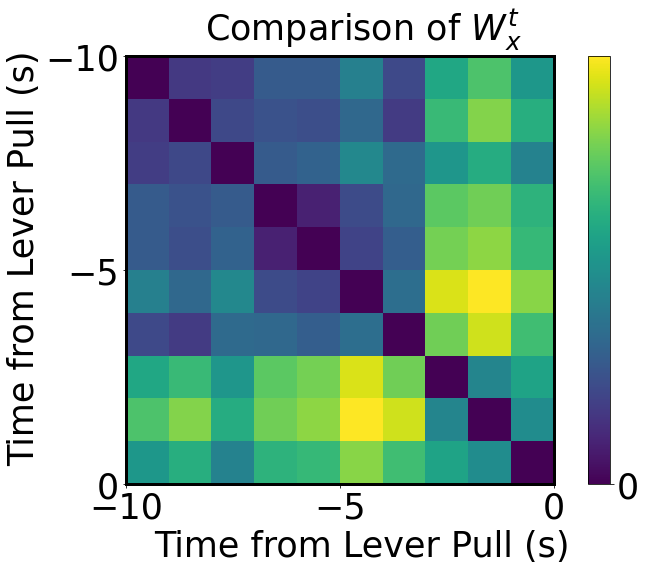

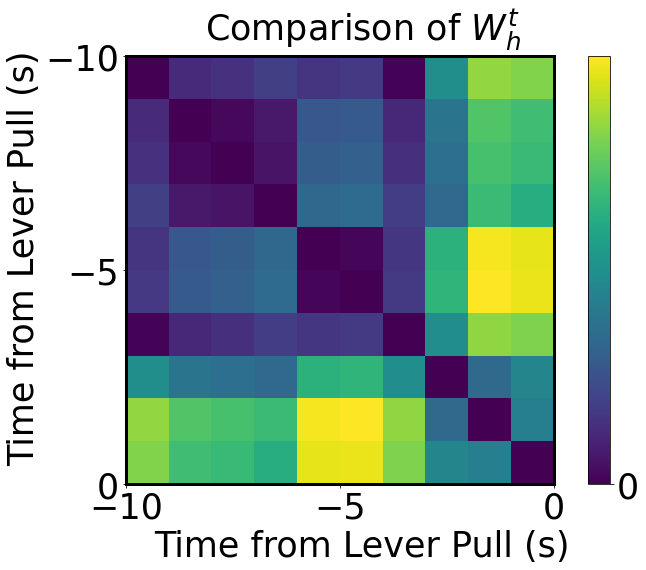

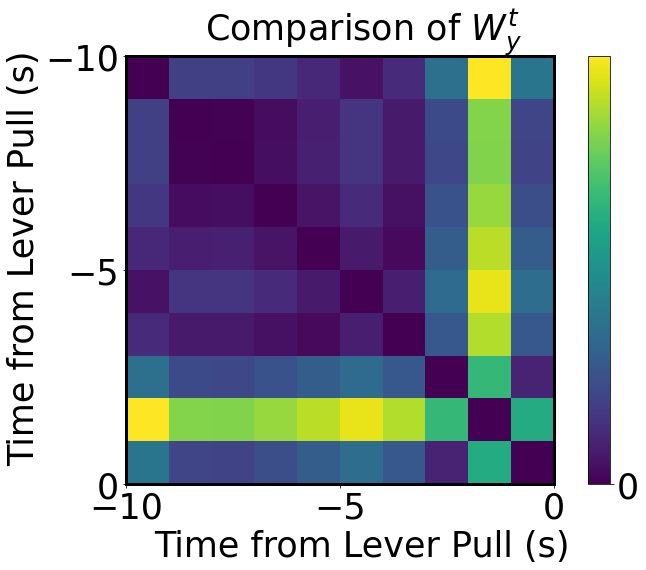

In [10]:
fig=analysis.plot_weight_ed(ed_ih,Wx=True,Wh=False,Wy=False)#input weights
fig=analysis.plot_weight_ed(ed_hh,Wx=False,Wh=True,Wy=False)#recurrent weights
fig=analysis.plot_weight_ed(ed_o,Wx=False,Wh=False,Wy=True)#output weights